<a href="https://colab.research.google.com/github/alexisdr/uned-tfg-deteccion-eas/blob/main/UNED-TFG-1-analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los datos

Se analizan los datos del Corpus PFG.

# Parameters

*  GoldStandardTrainingEAs.txt: contiene una relación de IDS de actos clínicos seguidos de una lista de uno o varios códigos EAs, en caso de que sean aplicables, o NONE en caso de no se haya idetnificado ningún código de efecto adverso. Todos los valores están separados por espacios. Ejemplos:
```
24866017 T50.2X5A
27448436 T83.021A T83.511A T83.091A Y84.6
25205191 NONE
```
*  EAs.txt: listado de todos los códigos de efectos adversos del CIE10 y su tipo. Ejemplo:
```
D61.810 - PROC
D61.811 - MED
```
*  CIE-10.tsv: definición del CIE10 completo.
*  Training: carpeta que contiene todos los informes médicos del conjunto de entrenamiento. El nombre del archivo está compuesto por el acto clínico y el identificador del informe. Ejemplo: 23062488-158483734.txt


In [1]:
ruta_base = '/drive/My Drive/CorpusPFG/'

#Archivos y rutas de los datos del CORPUS
ruta_archivo_GoldStandardTrainingEA = ruta_base + 'GoldStandardTrainingEAs.txt'
ruta_archivo_GoldStandardTestEA = ruta_base + 'GoldStandardTestEAs.txt'
ruta_archivo_codigos_EA = ruta_base + 'EAs.txt'
ruta_archivo_CIE10 = ruta_base + 'CIE-10.tsv'
ruta_archivos_entrenamiento = ruta_base + 'Training/'
ruta_archivos_test = ruta_base + 'Test/'

In [ ]:
!pip install -q unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.6 MB/s eta 0:00:00


Se realiza el montaje de la unidad de Google Drive para acceder a los ficheros

In [6]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


# EAs disponibles en los casos clínicos

Carga del archivo de texto GoldStandardTrainingEAs.txt y GoldStandardTestEAs.txt en un data set

In [10]:
import pandas as pd

column_names = ["Acto", "TieneEA_EA1",
                "EA2", "EA3", "EA4", "EA5", "EA6", "EA7", "EA8", "EA9", "EA10"]
df_goldStandardTrainingEAs = pd.read_csv(
    ruta_archivo_GoldStandardTrainingEA, sep=' ', header=None, names=column_names)

Consulta la cantidad de datos



In [ ]:
df_goldStandardTrainingEAs.count()

Acto           14502
TieneEA_EA1    14502
EA2              925
EA3              240
EA4               78
EA5               21
EA6                8
EA7                5
EA8                3
EA9                2
EA10               0
dtype: int64

Consulta de las primeras filas del data set

In [ ]:
df_goldStandardTrainingEAs.head()

,Acto,TieneEA_EA1,EA2,EA3,EA4,EA5,EA6,EA7,EA8,EA9,EA10
0,27690409,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24626366,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27967924,O90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25774939,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24878023,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se unen todos los códigos EAs de todas las columnas para conocer cuántos códigos EAs hay representados en los casos clínicos.

<ipython-input-7-eabea0667558>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
<ipython-input-7-eabea0667558>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA3)
<ipython-input-7-eabea0667558>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA4)
<ipython-input-7-eabea0667558>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA5)
<ipython-input-7-eabea0667558>:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. 

<Axes: xlabel='eas'>

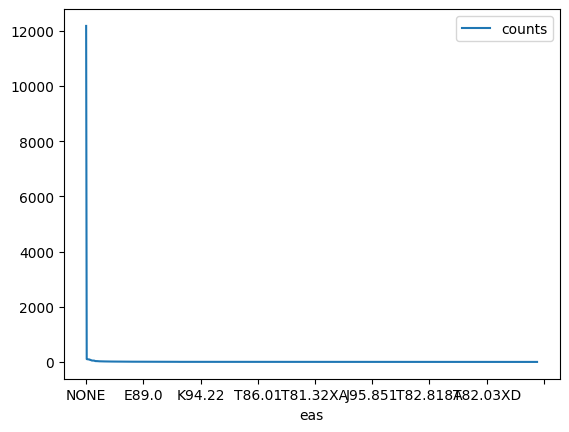

In [ ]:
def unir_columnas(dataframe):
  ds_cantidad_TieneEA_EA1 = dataframe.TieneEA_EA1.value_counts(dropna=True, sort=True)
  ds_cantidad_EA2 = dataframe.EA2.value_counts(dropna=True, sort=True)
  ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
  ds_cantidad_EA3 = dataframe.EA3.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA3)
  ds_cantidad_EA4 = df_goldStandardTrainingEAs.EA4.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA4)
  ds_cantidad_EA5 = df_goldStandardTrainingEAs.EA5.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA5)
  ds_cantidad_EA6 = df_goldStandardTrainingEAs.EA6.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA6)
  ds_cantidad_EA7 = df_goldStandardTrainingEAs.EA7.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA7)
  ds_cantidad_EA8 = df_goldStandardTrainingEAs.EA8.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA8)
  ds_cantidad_EA9 = df_goldStandardTrainingEAs.EA9.value_counts(dropna=True, sort=True)
  ds_all = ds_all.append(ds_cantidad_EA9)
  return ds_all

def genear_ds (dataframe):
  ds_all = unir_columnas(dataframe)
  df_cantidad = pd.DataFrame(ds_all)
  df_cantidad = df_cantidad.reset_index()
  df_cantidad.columns = ['eas', 'counts']
  df_cantidad = df_cantidad.sort_values(by=['counts'], ascending=False)
  return df_cantidad

df_cantidad = genear_ds(df_goldStandardTrainingEAs)
df_cantidad.plot(x='eas', y='counts', kind='line')

<Axes: xlabel='eas'>

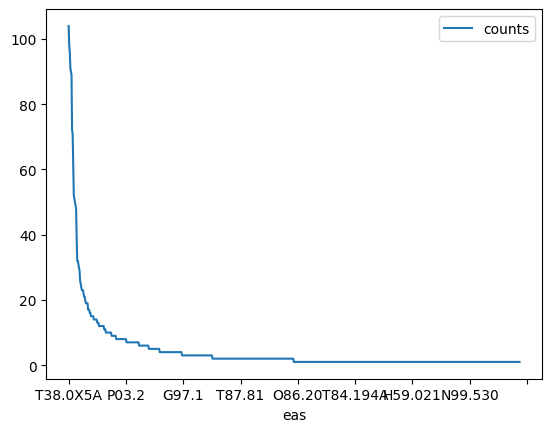

In [ ]:
df_cantidad_con_EAs = df_cantidad.query("eas != 'NONE'")
df_cantidad_con_EAs.plot(x='eas', y='counts', kind='line')

In [ ]:
df_cantidad_con_EAs.count()

eas       788
counts    788
dtype: int64

array([[<Axes: title={'center': 'counts'}>]], dtype=object)

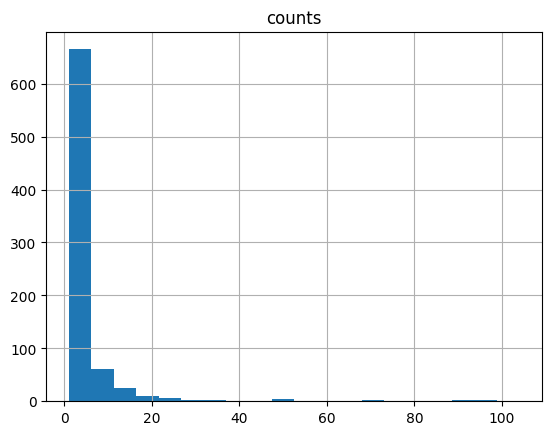

In [ ]:
df_cantidad_con_EAs.hist(bins = 20)

**Estadísticas de EAs**

In [ ]:
num_actos_clinicos = df_goldStandardTrainingEAs.Acto.count()
num_actos_clinicos_sin_EA = df_goldStandardTrainingEAs.query("TieneEA_EA1 == 'NONE'").TieneEA_EA1.count()
num_actos_clinicos_con_EA = num_actos_clinicos - num_actos_clinicos_sin_EA
num_eas_con_caso_clinico = df_cantidad.query("eas != 'NONE'")["eas"].nunique()

print("Actos clínicos: %s" % num_actos_clinicos)
print("Número de actos clínicos sin EA: %s, un %s%%" % (num_actos_clinicos_sin_EA, round(num_actos_clinicos_sin_EA/num_actos_clinicos*100, 2)))
print("Número de actos clínicos con EA: %s, un %s%%" % (num_actos_clinicos_con_EA, round(num_actos_clinicos_con_EA/num_actos_clinicos*100, 2)))
print("EAs diferentes encontrados en los actos clínicos: %s" % num_eas_con_caso_clinico)
print("")
print("Los 10 códigos CIE más frecuentes:")

df_cantidad.query("eas != 'NONE'").head(10)

Actos clínicos: 14502
Número de actos clínicos sin EA: 12181, un 84.0%
Número de actos clínicos con EA: 2321, un 16.0%
EAs diferentes encontrados en los actos clínicos: 484

Los 10 códigos CIE más frecuentes:


,eas,counts
1,T38.0X5A,104
2,T45.515A,98
3,T50.2X5A,96
4,Y95,91
5,P01.1,90
6,T81.4XXA,89
7,T45.1X5A,72
8,Y83.1,71
401,Y84.8,62
9,O75.2,52


In [ ]:
df_goldStandardTestEAs = pd.read_csv(
    ruta_archivo_GoldStandardTestEA, sep=' ', header=None, names=column_names)
df_cantidad_test = genear_ds(df_goldStandardTestEAs)

<ipython-input-7-eabea0667558>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
<ipython-input-7-eabea0667558>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA3)
<ipython-input-7-eabea0667558>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA4)
<ipython-input-7-eabea0667558>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA5)
<ipython-input-7-eabea0667558>:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
df_goldStandardTestEAs.query(
    "TieneEA_EA1 == 'T38.0X5A' or TieneEA_EA1 == 'T45.515A' or TieneEA_EA1 == 'T50.2X5A' or TieneEA_EA1 == 'Y95'")

,Acto,TieneEA_EA1,EA2,EA3,EA4,EA5,EA6,EA7,EA8,EA9,EA10
5,24866030,T38.0X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,26038214,T45.515A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,26774782,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,25135602,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,26387165,Y95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3401,26232245,Y95,K91.840,Y83.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3438,24551743,Y95,P36.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3527,25863547,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3554,25029447,Y95,D61.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Los 20 códigos CIE menos frecuentes:")

df_cantidad.sort_values(by=['counts']).head(20)

Los 20 códigos CIE menos frecuentes:


,eas,counts
582,K95.89,1
668,N99.71,1
667,T83.028A,1
666,T50.0X5A,1
665,T82.190A,1
664,T80.89XA,1
663,T39.395D,1
662,I97.89,1
661,T85.29XA,1
660,T86.13,1


In [ ]:
print("Códigos EA que están tanto en el archivo de entrenamiento como el archivo de test de entre los menos frecuentes")
df_cantidad_test.query(
    "eas == 'N99.71' or eas == 'T50.0X5A' or eas == 'I97.89' or eas == 'T84.63XA'")

Códigos EA que están tanto en el archivo de entrenamiento como el archivo de test de entre los menos frecuentes


,eas,counts
104,N99.71,1
115,I97.89,1
249,T84.63XA,1
241,T50.0X5A,1


Actos con los código menos frecuentes

In [ ]:
df_goldStandardTestEAs.query(
    "TieneEA_EA1 == 'N99.71' or TieneEA_EA1 == 'T50.0X5A' or TieneEA_EA1 == 'I97.89' or TieneEA_EA1 == 'T84.63XA' or " +
    "EA2 == 'N99.71' or EA2 == 'T50.0X5A' or EA2 == 'I97.89' or EA2 == 'T84.63XA'")

,Acto,TieneEA_EA1,EA2,EA3,EA4,EA5,EA6,EA7,EA8,EA9,EA10
2118,26081286,N99.71,Y69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2311,25057193,I97.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,24381774,T50.2X5A,T50.0X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3171,25790613,Y83.1,T84.63XA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#EAs disponibles

Se han identificado 4 tipos:
* *MED*: efectos adversos a medicamentos, vacunas o similar.
* *PROC*: complicaciones en procedimientos (por ej. cirugías).
* *DISP*: fallos en dispositivos médicos.
* *INF*: infecciones, ya sean nosocomiales o durante un tratamiento médico.

Carga del archivo de texto EAs.txt en un data set

In [ ]:
df_EAs = pd.read_csv(ruta_archivo_codigos_EA, sep='-', header=None, names=["Code", "Tipo"])
df_EAs['Code'] = df_EAs['Code'].str.strip()

Consulta la cantidad de datos

In [ ]:
df_EAs.count()

Code    594
Tipo    594
dtype: int64

Consulta de las primeras filas del data set

In [ ]:
df_EAs.head()

,Code,Tipo
0,A80.0,MED
1,D52.1,MED
2,D59.0,MED
3,D59.2,MED
4,D61.1,MED


Cantidad de EAs por tipo

In [ ]:
df_EAs.Tipo.value_counts()

 MED              238
 PROC             225
 PROC DISP         60
 PROC INF          47
 PROC MED          11
 PROC DISP INF      9
 MED PROC           2
 PROC MED INF       1
 INF                1
Name: Tipo, dtype: int64

<Axes: >

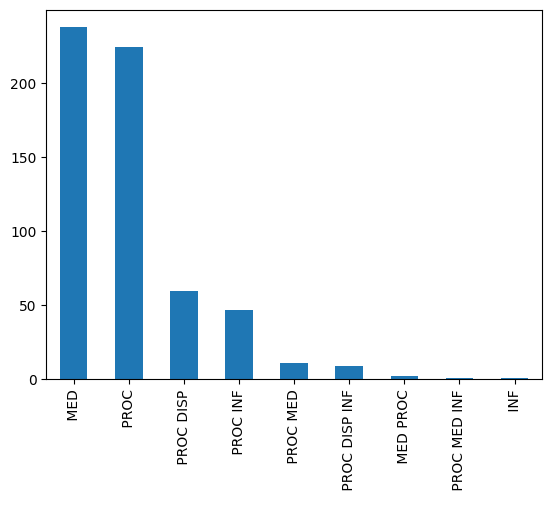

In [ ]:
df_EAs.Tipo.value_counts().plot(kind="bar")

Relación entre EAs totales frente a los EAs con ejemplos disponibles

In [ ]:
num_eas_totales = df_EAs["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales: %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

EAs totales: 594
EAs con representanción en caso clínico: 484
El 81.48% de los EAs se dan en al menos un caso clínico.


#Definición del CIE10

Carga del archivo de texto CIE-10.tsv en un data set

In [ ]:
df_CIE10 = pd.read_csv(ruta_archivo_CIE10, sep='\t', header=(0), low_memory=False)
df_CIE10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164656 entries, 0 to 164655
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Tipo                164656 non-null  object
 1   Code                164656 non-null  object
 2   Final               164656 non-null  int64 
 3   Length              164656 non-null  int64 
 4   Description         164656 non-null  object
 5   Add7                571 non-null     object
 6   Other description   23422 non-null   object
 7   First               293 non-null     object
 8   Also                146 non-null     object
 9   Additional          679 non-null     object
 10  Include             377 non-null     object
 11  Exclude 1           2534 non-null    object
 12  Exclude 2           899 non-null     object
 13  Note                53 non-null      object
 14  Parent Description  80343 non-null   object
 15  Parent Add7         54165 non-null   object
 16  Pa

Consulta de las primeras filas del data set

In [ ]:
df_CIE10.head()

,Tipo,Code,Final,Length,Description,Add7,Other description,First,Also,Additional,...,Note,Parent Description,Parent Add7,Parent First,Parent Also,Parent Additional,Parent Include,Parent Exclude 1,Parent Exclude 2,Parent Note
0,diagnóstico,A00,0,3,Cólera,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,diagnóstico,A00.0,1,4,"Cólera debido a Vibrio cholerae 01, biotipo ch...",NaN,"Cólera, clásica / Cólera, debida a Vibrio cho...",NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,diagnóstico,A00.1,1,4,"Cólera debido a Vibrio cholerae 01, biotipo El...",NaN,"Cólera, debida a Vibrio cholerae, biovar eltor...",NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diagnóstico,A00.9,1,4,"Cólera, no especificado",NaN,Cólera (Asiática) (epidémica) (maligna) / Cóle...,NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,diagnóstico,A01,0,3,Fiebres tifoidea y paratifoidea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conteo de los datos del dataset.

In [ ]:
df_CIE10.count()

Tipo                  164656
Code                  164656
Final                 164656
Length                164656
Description           164656
Add7                     571
Other description      23422
First                    293
Also                     146
Additional               679
Include                  377
Exclude 1               2534
Exclude 2                899
Note                      53
Parent Description     80343
Parent Add7            54165
Parent First            5624
Parent Also            16218
Parent Additional       9550
Parent Include         18506
Parent Exclude 1       43587
Parent Exclude 2       43150
Parent Note            16181
dtype: int64

Tomamos el fichero de códigos EAs y buscamos los registros en el fichero del CIE 10 que coincidan con su código.

In [ ]:
listaCodigosEAs = list(df_EAs.Code.values)
df_CIE10_EAs_Parcial = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAs)]
df_CIE10_EAs_Parcial.head()

,Tipo,Code,Final,Length,Description,Add7,Other description,First,Also,Additional,...,Note,Parent Description,Parent Add7,Parent First,Parent Also,Parent Additional,Parent Include,Parent Exclude 1,Parent Exclude 2,Parent Note
592,diagnóstico,A80.0,1,4,"Poliomielitis paralítica aguda, asociada a vacuna",NaN,"Poliomielitis, paralítica, asociada a la vacuna",NaN,NaN,NaN,...,NaN,Poliomielitis aguda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3346,diagnóstico,D52.1,1,4,Anemia por carencia de ácido fólico inducida p...,NaN,"Anemia, debida a, deficiencia, folato, inducid...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Anemia por carencia de ácido fólico,NaN,NaN,NaN,NaN,NaN,carencia de ácido fólico sin anemia (E53.8),NaN,NaN
3403,diagnóstico,D59.0,1,4,Anemia hemolítica autoinmune inducida por fárm...,NaN,"Anemia, hemolítica, autoinmune, inducido por f...",NaN,NaN,NaN,...,NaN,Anemia hemolítica adquirida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405,diagnóstico,D59.2,1,4,Anemia hemolítica no autoimmune inducida por f...,NaN,"Anemia, deficiencia, enzima, inducido por fárm...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Anemia hemolítica adquirida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,diagnóstico,D61.1,1,4,Anemia aplásica inducida por fármacos,NaN,"Anemia, aplásica, debida a, drogas / Anemia, ...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Otras anemias aplásicas y síndromes de insufic...,NaN,NaN,NaN,NaN,NaN,neutropenia (D70.-),NaN,NaN


Contamos los registros encontrados en el fichero CIE10. El número coincide con el número de dato del fichero EAs.

In [ ]:
df_CIE10_EAs_Parcial.count()

Tipo                  594
Code                  594
Final                 594
Length                594
Description           594
Add7                    2
Other description     468
First                   4
Also                    1
Additional             99
Include                 5
Exclude 1              41
Exclude 2              37
Note                    0
Parent Description    546
Parent Add7           242
Parent First           16
Parent Also             6
Parent Additional      93
Parent Include         45
Parent Exclude 1      160
Parent Exclude 2      246
Parent Note             0
dtype: int64

De los datos encontrados en el fichero CIE10, se determinan cuántos de los códigos son finales y los que no lo son.

In [ ]:
df_CIE10_EAs_Parcial.Final.value_counts()

0    330
1    264
Name: Final, dtype: int64

<Axes: >

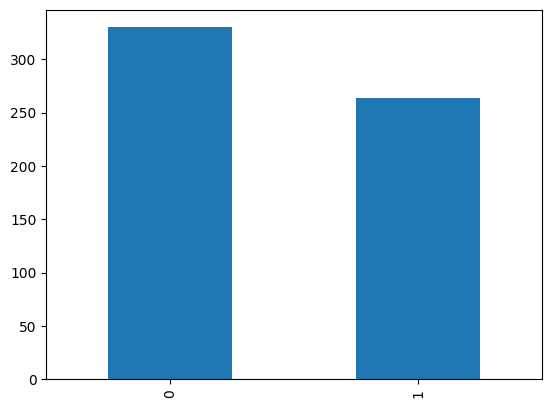

In [ ]:
df_CIE10_EAs_Parcial.Final.value_counts().plot(kind='bar')

Se crea una lista con los códigos no finales, por cada uno de ellos se buscan los que continúan la jerarquía. Por ejemplo, para el código "D70" que no es final, se buscan los códigos "D70.0", "D70.1", "D70.2", ... que sí lo son. Además, se añaden a la lista de códigos EA completa los códigos finales.

In [ ]:
listaCodigosEAsCompleta=[]
listaCodigosEAsNoFinal = list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 0].Code.values)
for ea in listaCodigosEAsNoFinal:
  listaCodigosEAsCompleta.extend(list(df_CIE10[df_CIE10['Code'].str.startswith(ea)].Code))
listaCodigosEAsCompleta.extend(list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 1].Code.values))

Se toma la lista de códigos completa y se busca sobre el fichero CIE10, obteniendo con ello el subconjunto de códigos CIE10 que se correspoden con EAs.

In [ ]:
df_CIE10_EAs_Completa = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAsCompleta)]


In [ ]:
df_CIE10_EAs_Completa.count()

Tipo                  4176
Code                  4176
Final                 4176
Length                4176
Description           4176
Add7                    11
Other description     1491
First                    5
Also                     1
Additional             131
Include                  5
Exclude 1               83
Exclude 2               55
Note                     0
Parent Description    3683
Parent Add7           2474
Parent First           143
Parent Also              6
Parent Additional      862
Parent Include         333
Parent Exclude 1       913
Parent Exclude 2      2488
Parent Note              0
dtype: int64

In [ ]:
num_eas_totales = df_CIE10_EAs_Completa["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales (considerando la lista completa): %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

EAs totales (considerando la lista completa): 4176
EAs con representanción en caso clínico: 484
El 11.59% de los EAs se dan en al menos un caso clínico.


In [ ]:
#df_CIE10_EAs_Completa.to_csv(base_path + 'df_CIE10_EAs_Completa.csv')

#Composición de los informes médicos


In [7]:
import os

lista_archivos_entrenamiento = [f for f in os.listdir(ruta_archivos_entrenamiento)
        if os.path.isfile(os.path.join(ruta_archivos_entrenamiento, f))]
lista_archivos_test = [f for f in os.listdir(ruta_archivos_test)
        if os.path.isfile(os.path.join(ruta_archivos_test, f))]

In [ ]:
from tqdm.notebook import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def obtener_estadisticas_archivo(nombre_archivo):
  # Obtener el tamaño del archivo en bytes
  tamano = os.path.getsize(nombre_archivo)

  # Contar el número de palabras en el archivo
  with open(nombre_archivo, 'r') as archivo:
      contenido = archivo.read()
      palabras = contenido.split()
      num_palabras = len(palabras)

  # También puedes agregar otras estadísticas, como el número de líneas, caracteres, etc.
  with open(nombre_archivo, 'r') as archivo:
      num_lineas = sum(1 for linea in archivo)

  resultados = ({
      'tamano':tamano,
      'num_palabras':num_palabras,
      'num_lineas':num_lineas})
  return resultados

def obtener_estadisticas_carpeta(ruta_archivos, lista_archivos):
  df_resultados = pd.DataFrame(columns=["tamano", "num_palabras", "num_lineas"])
  for nombre_informe in tqdm(lista_archivos):
    df_resultados = df_resultados.append(
        obtener_estadisticas_archivo(ruta_archivos + nombre_informe), ignore_index=True)

  media_tamano = df_resultados['tamano'].mean()
  mediana_tamano = df_resultados['tamano'].median()
  max_tamano = df_resultados['tamano'].max()
  min_tamano = df_resultados['tamano'].min()

  media_num_palabras = df_resultados['num_palabras'].mean()
  mediana_num_palabras = df_resultados['num_palabras'].median()
  max_num_palabras = df_resultados['num_palabras'].max()
  min_num_palabras = df_resultados['num_palabras'].min()

  media_num_lineas = df_resultados['num_lineas'].mean()
  mediana_num_lineas = df_resultados['num_lineas'].median()
  max_num_lineas = df_resultados['num_lineas'].max()
  min_num_lineas = df_resultados['num_lineas'].min()

  return ({
      'tamano':{'media':media_tamano, 'mediana':mediana_tamano, 'max':max_tamano, 'min':min_tamano},
      'num_palabras':{'media':media_num_palabras, 'mediana':mediana_num_palabras, 'max':max_num_palabras, 'min':min_num_palabras},
      'num_lineas':{'media':media_num_lineas, 'mediana':mediana_num_lineas, 'max':max_num_lineas, 'min':min_num_lineas}})

print ("TEST ############################ ")
print (obtener_estadisticas_carpeta(ruta_archivos_test, lista_archivos_test))

TEST ############################ 


  0%|          | 0/3981 [00:00<?, ?it/s]

In [ ]:
from unidecode import unidecode
import re

re_anonimizacion = re.compile(r'_\w+_XXXX_')
re_solo_texto = re.compile(r'[^\w]')
re_es_marca_pagina = re.compile(r'pagina [0-9] \/ [0-9]')
re_firma_servicio = re.compile(r'servicio de [a-z]*')

re_juicio1 = re.compile(r'juicio [a-z]*')
re_juicio2 = re.compile(r'j[a-z]* clinico')

campos = ["nif", "telefono", "movil", "fecha ingreso", "fecha alta"]

def omitir_textos_anonimizacion (linea):
  # busca expresiones del tipo _HOSPITAL_XXXX_ _DIRECCION_XXXX_
  return re_anonimizacion.sub ('', linea)

def normalizar_texto (linea):
  linea = unidecode(linea)
  linea = linea.lower()
  return linea

def omitir_no_texto (linea):
  return re_solo_texto.sub (' ', linea)

def detectar_etiquetas (linea):
  words = linea.strip().split()
  if len(words) >= 1 and len(words) <= 3:
      return linea
  return ""

def es_marca_pagina (linea):
  if (re_es_marca_pagina.match (linea)):
    return ""
  return linea

def es_firma_de_servicio (linea):
  if (re_firma_servicio.match (linea)):
    return ""
  return linea

def quitar_campos (linea):
  for campo in campos:
    if (campo in linea):
      return ""
  return linea

In [11]:
lista_ficheros_con_juicio = list()
lista_ficheros_con_gestacion = list()
lista_ficheros_resto = list()

for nombre_informe in lista_archivos_entrenamiento:
  encontrado = False
  with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico:
    for lineaTexto in informe_medico:
      lineaTexto = normalizar_texto(lineaTexto.strip())
      lineaTexto = omitir_textos_anonimizacion(lineaTexto.strip())
      if ("jdtco" in lineaTexto or "jc" in lineaTexto
          or re_juicio1.match (lineaTexto) != None
          or re_juicio2.match (lineaTexto) != None):
        encontrado = True
        lista_ficheros_con_juicio.append(nombre_informe)
        break
  if (not encontrado):
    with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico:
      for lineaTexto in informe_medico:
        lineaTexto = normalizar_texto(lineaTexto.strip())
        lineaTexto = omitir_textos_anonimizacion(lineaTexto.strip())
        if ("gestacion" in lineaTexto):
          encontrado = True
          lista_ficheros_con_gestacion.append(nombre_informe)
          break
  if (not encontrado):
    lista_ficheros_resto.append(nombre_informe)

total_fichero_entrenamiento = len(lista_archivos_entrenamiento)
total_ficheros_con_juicio = len(lista_ficheros_con_juicio)
total_ficheros_con_gestacion = len(lista_ficheros_con_gestacion)
total_ficheros_sin_seccion = len(lista_ficheros_resto)

print("Número total de ficheros de entrenamiento: %s" % total_fichero_entrenamiento)
print("Número total de ficheros CON sección de juicio clínico: %s, un %s%% del total" %
      (total_ficheros_con_juicio, round(total_ficheros_con_juicio/total_fichero_entrenamiento*100, 2)))
print("Número total de ficheros CON sección de gestación (obstétricos): %s, un %s%% del total"  %
      (total_ficheros_con_gestacion, round(total_ficheros_con_gestacion/total_fichero_entrenamiento*100, 2)))
print("Número total de ficheros sin sección: %s, un %s%% del total"  %
      (total_ficheros_sin_seccion, round(total_ficheros_sin_seccion/total_fichero_entrenamiento*100, 2)))

NameError: ignored

Lista de ficheros que tienen otras secciones y además tienen algún EA

In [ ]:
lista_actos_con_EA = list()

for archivo in lista_ficheros_resto:
  resultado = df_goldStandardTrainingEAs.query("Acto == " + archivo.split("-")[0])
  if (resultado.TieneEA_EA1.item() != "NONE"):
    lista_actos_con_EA.append(archivo)

lista_actos_con_EA

['23062488-162179798-extracto.txt',
 '28110281-172829921.txt',
 '28170070-172944052.txt',
 '27077815-169870323.txt',
 '27108053-170138671.txt',
 '27418011-171011614.txt',
 '27440382-170876634.txt',
 '26233466-167448297.txt',
 '25954796-167234095.txt',
 '25534095-165673211.txt',
 '25696839-165881896.txt',
 '25696839-165892145.txt',
 '25135315-164508150.txt',
 '24804681-163277298.txt',
 '24911805-163716937.txt',
 '24472493-162517340.txt',
 '24477455-162460795.txt',
 '24477455-162473073.txt',
 '24534830-162570142.txt',
 '24566071-162693008.txt',
 '24587560-162743130.txt',
 '24649380-162872040.txt',
 '24695760-163055865.txt',
 '24720463-163051400.txt',
 '24350470-162035398.txt',
 '24352126-162148285.txt',
 '24369280-162497291.txt',
 '24023988-161086821.txt']

Lista de secciones de los ficheros outlayers

In [ ]:
lista_etiquetas_ficheros = list()

for nombre_informe in lista_ficheros_resto:
  with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico:
    lista_etiquetas_informe = list()
    for lineaTexto in informe_medico:
      lineaTexto = omitir_textos_anonimizacion(lineaTexto)
      lineaTexto = normalizar_texto(lineaTexto)
      lineaTexto = es_marca_pagina(lineaTexto)
      lineaTexto = es_firma_de_servicio(lineaTexto)
      lineaTexto = quitar_campos(lineaTexto)
      lineaTexto = omitir_no_texto(lineaTexto)
      etiqueta = detectar_etiquetas(lineaTexto)
      if (etiqueta != ""):
        lista_etiquetas_informe.append(etiqueta.strip())
  lista_etiquetas_ficheros.append([nombre_informe, lista_etiquetas_informe])

lista_etiquetas_ficheros

[['28321067-173577657.txt', ['sexo  mujer']],
 ['28322510-173390710.txt',
  ['bajo anestesia general',
   'tratamiento a seguir',
   'reposo relativo',
   'oclusion 24h od']],
 ['28405251-173677510.txt',
  ['sexo  mujer',
   'motivo de alta',
   'antecedentes personales',
   'colitis ulcerosa',
   'hipercolesterolemia',
   'anemia ferropenica',
   'no habitos toxicos',
   'pruebas complentarias',
   'estudio  esofagogastroduodenal',
   'minimo  reflujo  gastroesofagico',
   'tratamiento quirurgico',
   'evolucion']],
 ['28419501-173677606.txt',
  ['sexo  mujer',
   'motivo de alta',
   'alergias',
   'sin alertas conocidas',
   'recomendaciones']],
 ['28465274-173944798.txt',
  ['sexo  hombre',
   'solicitud de arteriografia',
   'antecedentes',
   'no alergias conocidas',
   'no habitos toxicos',
   'cx  polipos colonicos',
   'tratamiento actual',
   'suspender adiro',
   'pruebas realizadas',
   'diagnostico']],
 ['28471496-173878846.txt',
  ['sexo  hombre',
   'antecedentes',
   'a